In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sbn
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
from statsmodels.tsa.stattools import ARMA, adfuller
from datetime import datetime
from sklearn.metrics import mean_squared_error
from math import sqrt

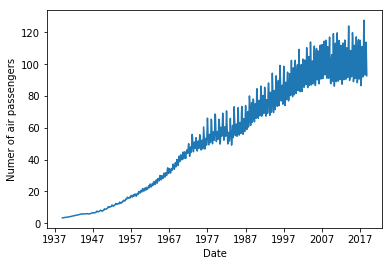

In [7]:
series=pd.read_csv('Electricity_production.csv',parse_dates=['DATE'],index_col=['DATE'])
series.head()
plt.xlabel('Date')
plt.ylabel('Numer of air passengers')
plt.plot(series)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

MAPE: 1.6150250367362204
Test RMSE: 0.068


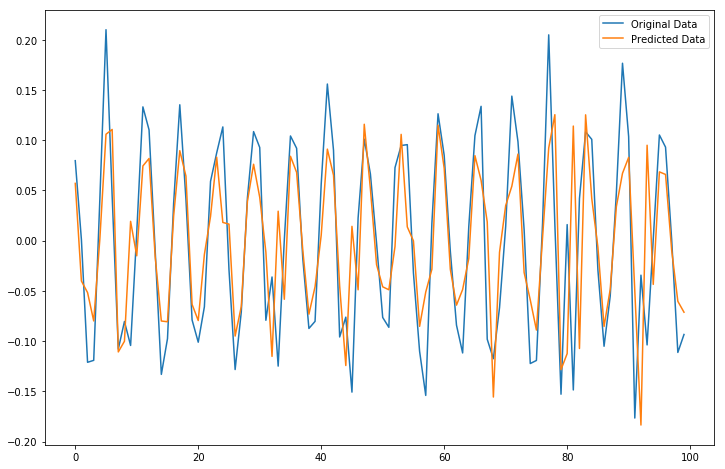

In [15]:
#AR MODEL
def predict(coef, history):
    yhat = 0.0
    for i in range(1, len(coef)+1):
        yhat += coef[i-1] * history[-i]
    return yhat
def mape_vectorized_v2(a, b): 
    mask = a !=0
    return (np.fabs(a - b)/a)[mask].mean()
ts_log = np.log(series)
ts_log_diff = ts_log - ts_log.shift() #differencing step
ts_log_diff.dropna(inplace = True)
X = ts_log_diff.values
size = len(X) - 100
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,0,0))
    model_fit = model.fit(trend='nc', disp=False)
    ar_coef = model_fit.arparams
    #print(ar_coef)
    yhat = predict(ar_coef, history)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
print('MAPE:',mape_vectorized_v2(test,predictions))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(12,8))
plt.plot(test, label = 'Original Data')
plt.plot(predictions, label = 'Predicted Data')
plt.legend(loc = 'best')
plt.show()

MAPE: 0.3874497206795279
Test RMSE: 0.083


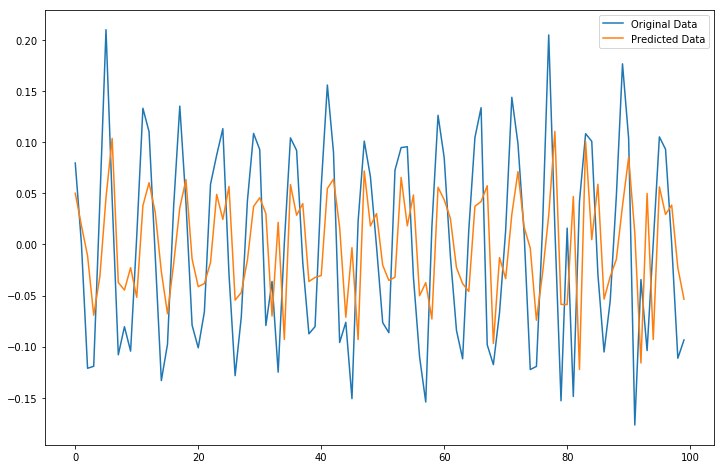

In [25]:
#MA MODEL
X = ts_log_diff.values
size = len(X) - 100
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
residuals = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit(trend='nc', disp=False)
    ma_coef = model_fit.maparams
    resid = model_fit.resid
    yhat = predict(ma_coef, resid)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
    error = obs - yhat # expected-predicted
    residuals.append(error)
print('MAPE:',mape_vectorized_v2(test,predictions[1]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(12,8))
plt.plot(test, label = 'Original Data')
plt.plot(predictions, label = 'Predicted Data')
plt.legend(loc = 'best')

In [36]:
from statsmodels.tsa.stattools  import acf, pacf

lag_acf = acf(X, nlags = 12)
lag_pacf = pacf(X, nlags = 12)

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


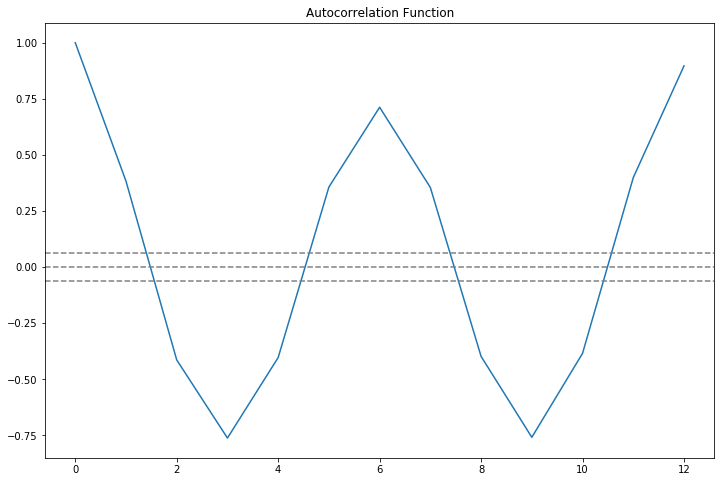

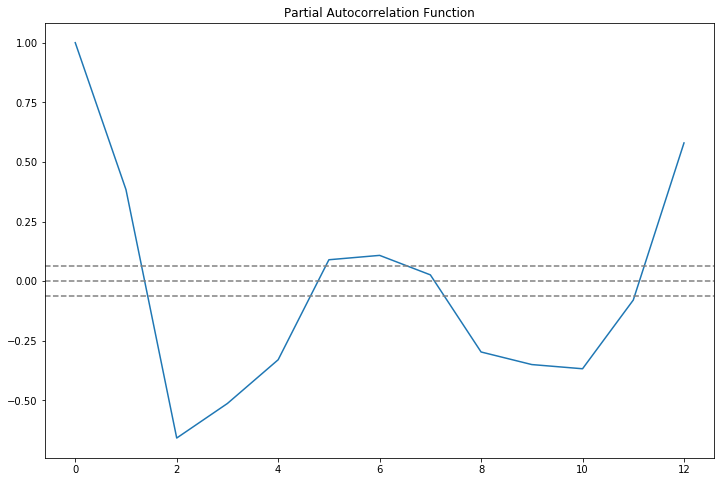

In [37]:
plt.figure(figsize=(12,8))
plt.plot(lag_acf)
plt.axhline(linestyle = '--', color = 'gray', y = 0)
plt.axhline(linestyle = '--', color = 'gray', y = -1.96/np.sqrt(len(X)))
plt.axhline(linestyle = '--', color = 'gray', y = 1.96/np.sqrt(len(X)))
plt.title('Autocorrelation Function')
plt.show()

#plt.subplot(122)
plt.figure(figsize=(12,8))
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(X)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

MAPE: 1.6150250367362204
Test RMSE: 0.068


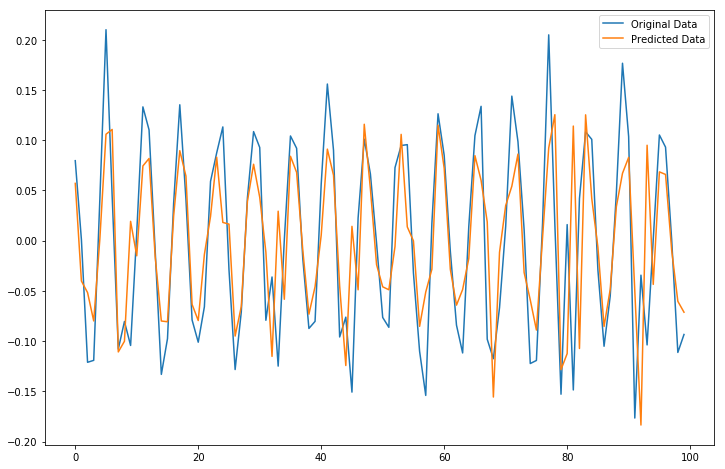

In [17]:
#ARMA MODEL
X = ts_log_diff.values
size = len(X) - 100
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARMA(history, order=(2,0,1))
	model_fit = model.fit(trend='nc', disp=False)
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	yhat = predict(ar_coef, history) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('MAPE:',mape_vectorized_v2(test,predictions))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(12,8))
plt.plot(test, label = 'Original Data')
plt.plot(predictions, label = 'Predicted Data')
plt.legend(loc = 'best')

In [19]:
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return np.array(diff)

MAPE: 0.07443708597278302
Test RMSE: 8.843


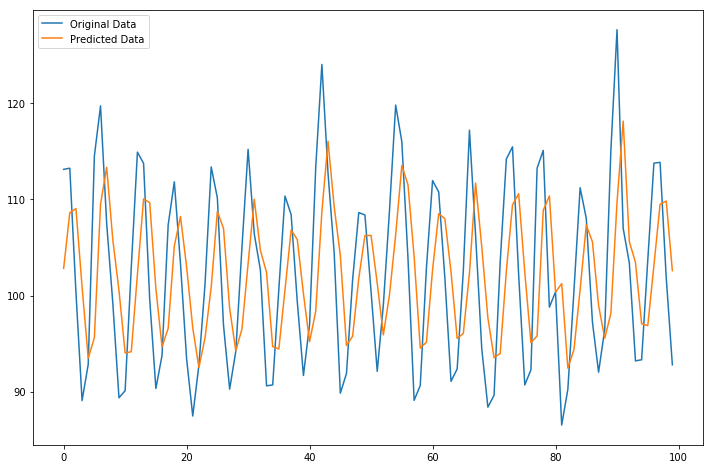

In [20]:

#ARIMA MODEL
X = series.values
size = len(X) - 100
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(1,1,1))
	model_fit = model.fit(trend='nc', disp=False)
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('MAPE:',mape_vectorized_v2(test,predictions))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(12,8))
plt.plot(test, label = 'Original Data')
plt.plot(predictions, label = 'Predicted Data')
plt.legend(loc = 'best')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

MAPE: 4.444427740967793
Test RMSE: 0.101


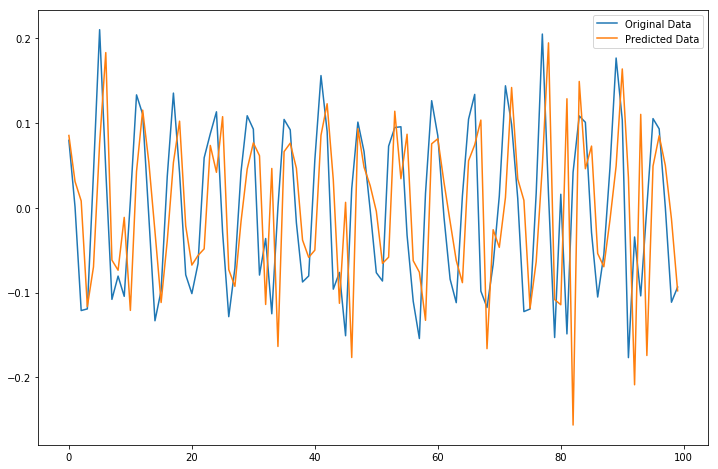

In [22]:
X = ts_log_diff.values
size = len(X) - 100
train, test = X[0:size], X[size:]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(2,1,0))
	model_fit = model.fit(trend='nc', disp=False)
	ar_coef, ma_coef = model_fit.arparams, model_fit.maparams
	resid = model_fit.resid
	diff = difference(history)
	yhat = history[-1] + predict(ar_coef, diff) + predict(ma_coef, resid)
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('>predicted=%.3f, expected=%.3f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('MAPE:',mape_vectorized_v2(test,predictions))
print('Test RMSE: %.3f' % rmse)
plt.figure(figsize=(12,8))
plt.plot(test, label = 'Original Data')
plt.plot(predictions, label = 'Predicted Data')
plt.legend(loc = 'best')

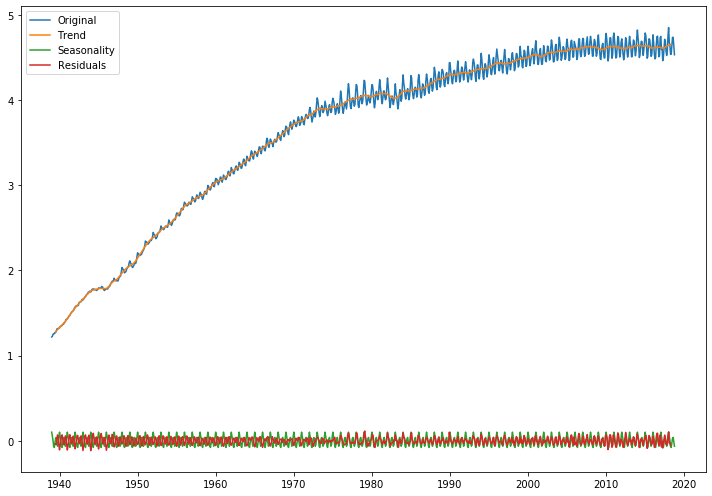

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

#plt.subplot(411)
plt.figure(figsize = (10,7))
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
#plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
#plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
#plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

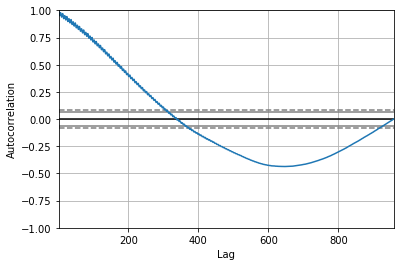

In [17]:
pd.plotting.autocorrelation_plot(series)
plt.show()

C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\hp\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:           D.IPG2211A2N   No. Observations:                  957
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2369.544
Method:                       css-mle   S.D. of innovations              2.873
Date:                Sat, 19 Oct 2019   AIC                           4753.087
Time:                        00:44:34   BIC                           4787.134
Sample:                    02-01-1939   HQIC                          4766.055
                         - 10-01-2018                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.1043      0.039      2.681      0.007       0.028       0.181
ar.L1.D.IPG2211A2N    -0.0161      0.032     -0.499      0.618      -0.079       0.047
ar.L2.D.IPG2211A2N  

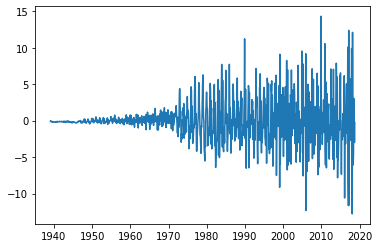

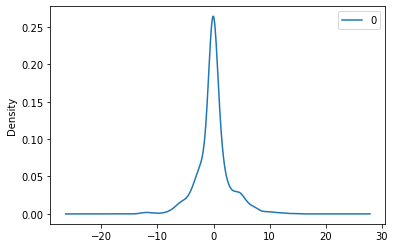

                0
count  957.000000
mean    -0.000227
std      2.874656
min    -12.800111
25%     -0.948717
50%     -0.127509
75%      0.805655
max     14.323161


In [18]:
from statsmodels.tsa.arima_model import ARIMA
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
plt.plot(residuals)
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\ProgramData\Anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arra

MAPE: 0.03522185864202979
Test RMSE: 4.378


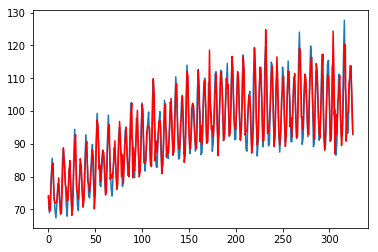

In [21]:
from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = np.sqrt(mean_squared_error(test, predictions))
print('MAPE:',mape_vectorized_v2(test,predictions))
print('Test RMSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

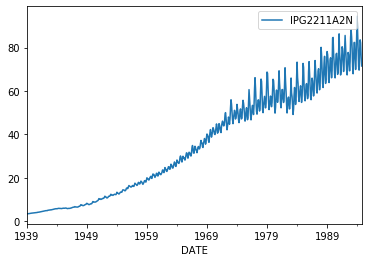

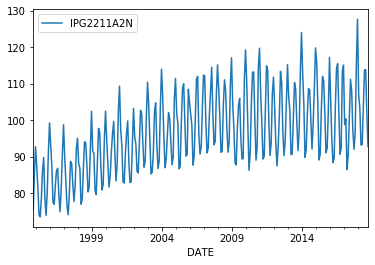

In [21]:
#divide into train and validation set
train = series[:int(0.7*(len(series)))]
valid = series[int(0.7*(len(series))):]

#plotting the data
train.plot()
valid.plot()